In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x): 
    return np.square(x) 

def f_prim(x): 
    return 2*x

In [4]:
def f2(x): 
    return np.power(x,3) - 10 * np.square(x)

def f2_prim(x):
    return 3*np.square(x) - 20 *x 

In [5]:
def f3(x): 
    return np.power(x,4) - 10 * np.square(x) - 2* x

def f3_prim(x):
    return 4*np.power(x,3) - 20 *x  -2 

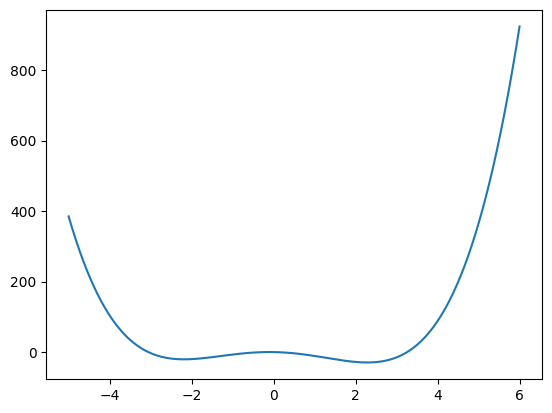

In [6]:
X = np.linspace(-5,6,1000)
Y = f3(X)
plt.plot(X,Y)

In [7]:
def gradient_descent(start, learning_rate, iterations, gradient):
    x = start
    history  = np.array([x])
    for _ in range(iterations):
        grad = gradient(x)
        x -= learning_rate * grad
        history = np.append(history, x)
    return history

In [8]:
def stochastic_gradient_descent(start, learning_rate, iterations, gradient, noise_type, sigma=0.01):
    x = start
    history  = np.array([x])
    for _ in range(iterations):
        grad = gradient(x)
        if noise_type=="normal":
            noise = np.random.normal(0,sigma)
        elif noise_type=="uniform":
            noise = np.random.uniform(-sigma, sigma)
        else:
            noise =0
        x -= learning_rate * grad + noise
        history = np.append(history, x)
    return history

In [9]:
def momentum(start, learning_rate, iterations, gradient, gamma):
    x = start
    history  = np.array([x])
    v = 0
    for _ in range(iterations):
        grad = gradient(x)
        v = gamma * v  - learning_rate * grad
        x = x + v
        history = np.append(history, x)
    return history

In [10]:
def RMSprop(start, learning_rate, iterations, gradient, beta, epsilon=0.000001):
    x = start
    history  = np.array([x])
    e_g_2 = 0
    for _ in range(iterations):
        grad = gradient(x)
        e_g_2 = beta * e_g_2 + (1-beta) * np.power(grad,2)
        x = x - lr / (np.sqrt(e_g_2+epsilon)) * grad
        history = np.append(history, x)
    return history

In [14]:
def ADAM(start, learning_rate, iterations, gradient, beta_1, beta_2, epsilon=0.000001):
    x = start
    history  = np.array([x])
    m = 0
    v = 0
    for _ in range(iterations):
        grad = gradient(x)
        x = x - lr / (np.sqrt(v) + epsilon) * m
        m = beta_1 * m + (1-beta_1) * grad
        v = beta_2 * v + (1-beta_2) * np.power(grad,2)
        history = np.append(history, x)
    return history

In [15]:
def plot(f, points, labels, bounds_x, bounds_y):
    plt.figure(figsize =(5,3))
    x = np.linspace(bounds_x[0],bounds_x[1],1000)
    plt.plot(x,f(x))
    for point, label in zip(points, labels):
        plt.plot(point, f(point), label = label, marker = ".")
    plt.xlim(bounds_x[0],bounds_x[1])
    plt.ylim(bounds_y[0],bounds_y[1])
    plt.legend()
    plt.show()

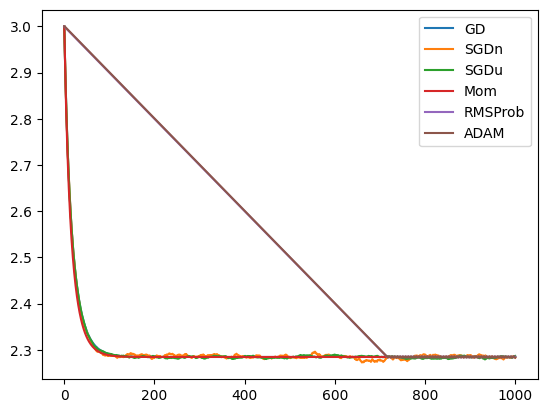

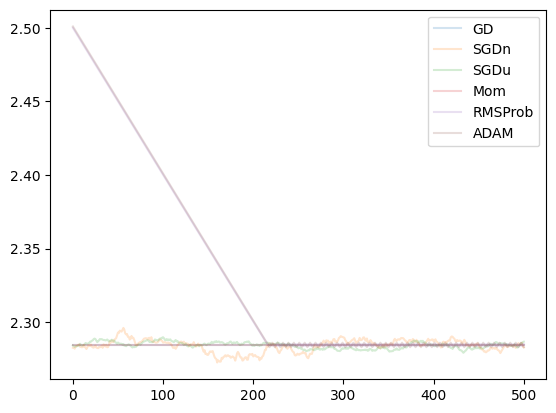

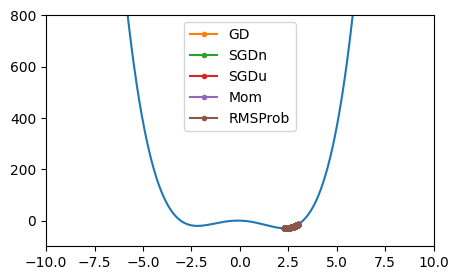

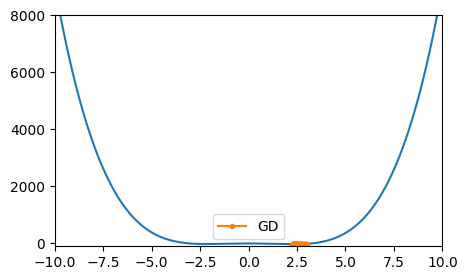

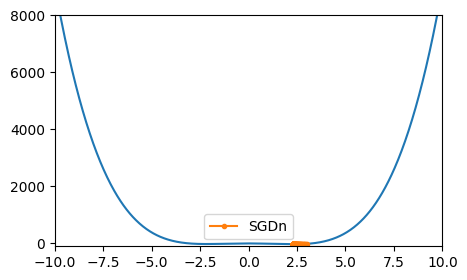

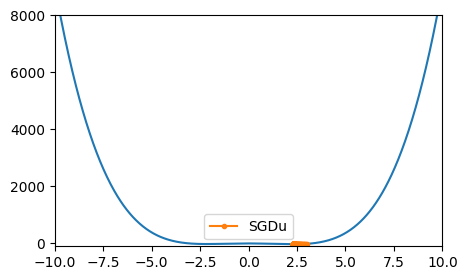

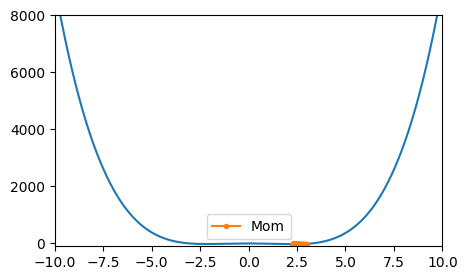

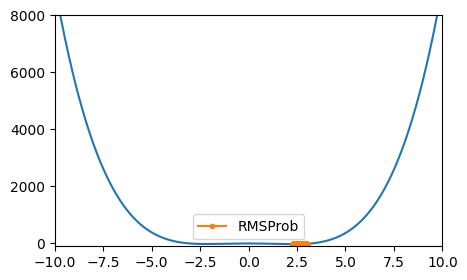

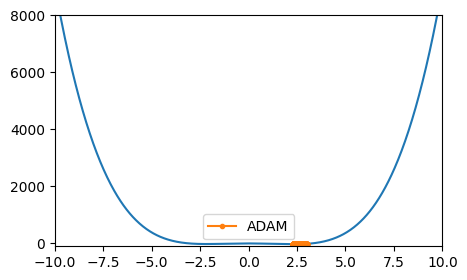

In [33]:
lr = 0.001
n_iteration = 1000
x_0 = 3

f_test = f3
f_prim_test = f3_prim


history_gd = gradient_descent(x_0, lr, n_iteration, f_prim_test) 
history_sgd_n = stochastic_gradient_descent(x_0, lr, n_iteration, f_prim_test,"normal", sigma=0.001) 
history_sgd_u = stochastic_gradient_descent(x_0, lr, n_iteration, f_prim_test,"uniform", sigma=0.001)
history_momentum = momentum(x_0, lr, n_iteration, f_prim_test, gamma = 0.1)

history_RMSProb = RMSprop(x_0, lr, n_iteration, f_prim_test, beta=0.1, epsilon=0.000001)
history_ADAM = ADAM(x_0, lr, n_iteration, f_prim_test, beta_1=0.00001, beta_2= 0.00001, epsilon=0.000001)

for hist, label in zip([history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb, history_ADAM],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb","ADAM"]):
    plt.plot(hist[:], label=label)
plt.legend()
plt.show()

for hist, label in zip([history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb, history_ADAM],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb","ADAM"]):
    plt.plot(hist[500:], label=label,alpha=0.2)
plt.legend()
plt.show()

plot(f_test,[history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb"], (-10, 10),(-100, 800))
for hist, label in zip([history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb, history_ADAM],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb","ADAM"]):
    plot(f_test,[hist],
                [label], (-10, 10),(-100, 8000))

In [29]:
history_RMSProb, history_ADAM

(array([ 1.0000000e+01, -3.7880000e+03,  2.1741512e+11, ...,
                   nan,            nan,            nan], shape=(1001,)),
 array([10.        , 10.        ,  9.99900001, ...,  9.00300001,
         9.00200001,  9.00100001], shape=(1001,)))

C:\Users\dell\AppData\Local\Temp\ipykernel_14848\1796468414.py:5: RuntimeWarning: overflow encountered in square
  return 3*np.square(x) - 20 *x


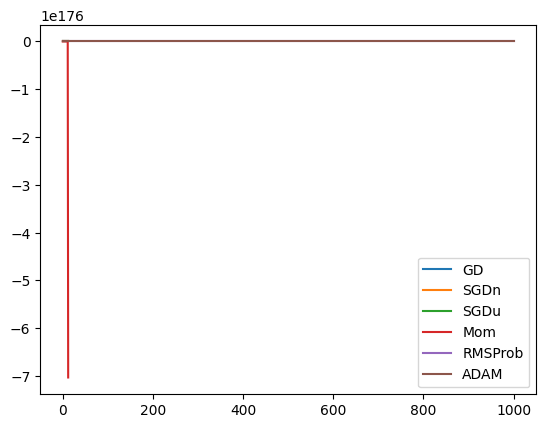

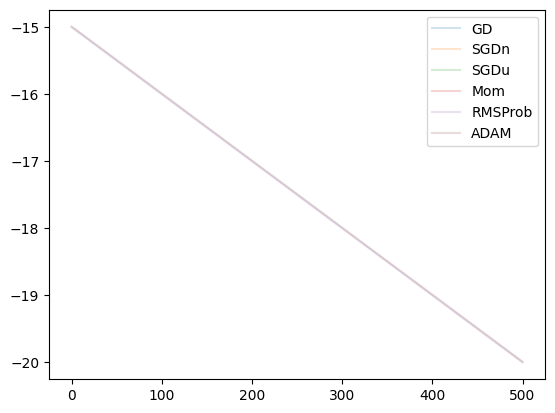

C:\Users\dell\AppData\Local\Temp\ipykernel_14848\1796468414.py:2: RuntimeWarning: overflow encountered in power
  return np.power(x,3) - 10 * np.square(x)
C:\Users\dell\AppData\Local\Temp\ipykernel_14848\1796468414.py:2: RuntimeWarning: overflow encountered in square
  return np.power(x,3) - 10 * np.square(x)


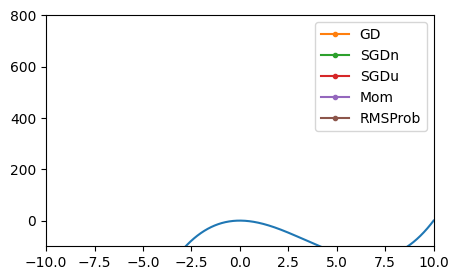

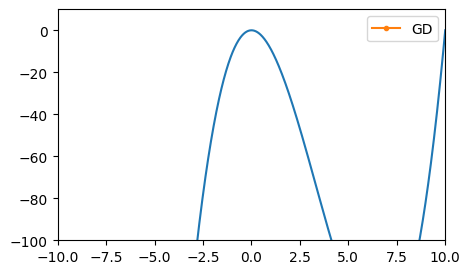

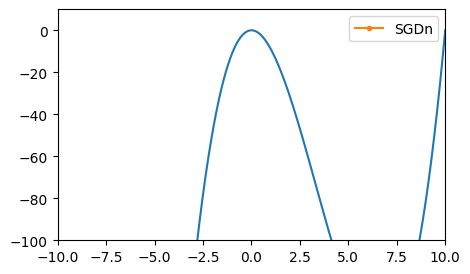

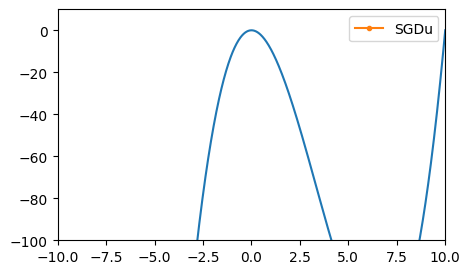

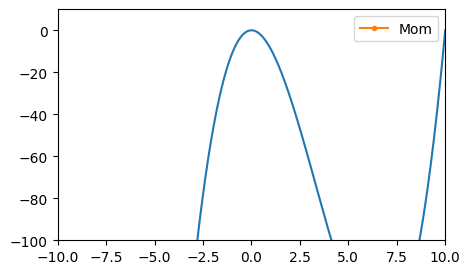

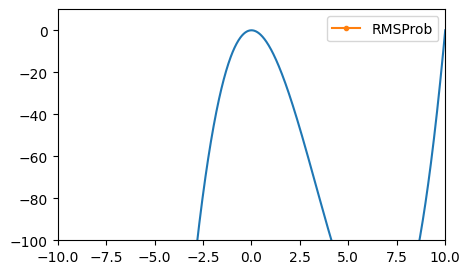

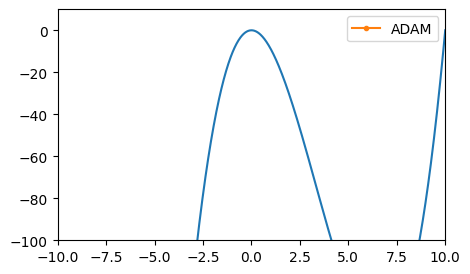

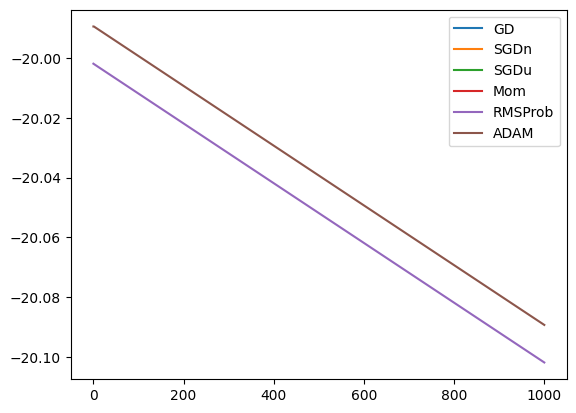

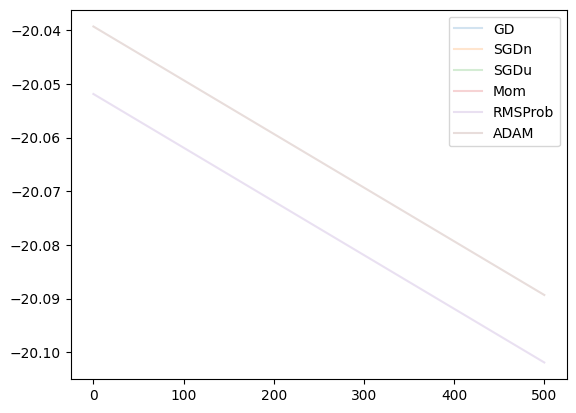

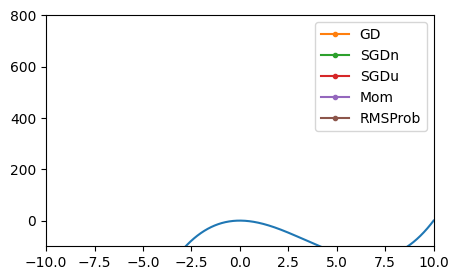

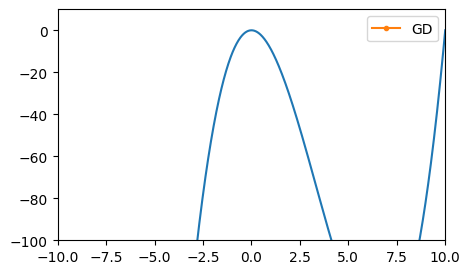

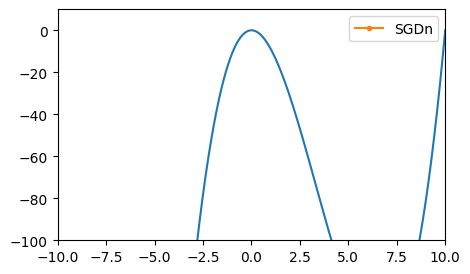

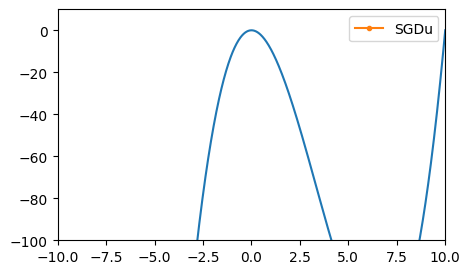

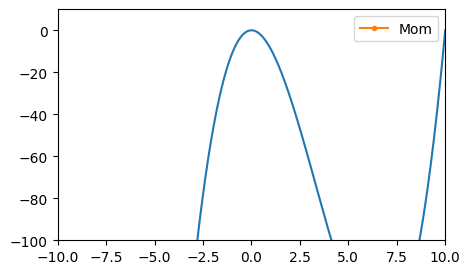

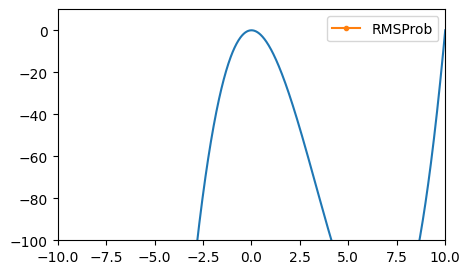

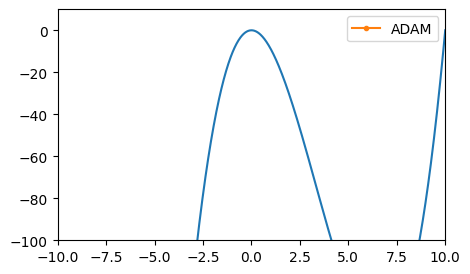

In [18]:
lr = 0.01
n_iteration = 1000
x_0 = -10

f_test = f2
f_prim_test = f2_prim


history_gd = gradient_descent(x_0, lr, n_iteration, f_prim_test) 
history_sgd_n = stochastic_gradient_descent(x_0, lr, n_iteration, f_prim_test,"normal", sigma=0.001) 
history_sgd_u = stochastic_gradient_descent(x_0, lr, n_iteration, f_prim_test,"uniform", sigma=0.001)
history_momentum = momentum(x_0, lr, n_iteration, f_prim_test, 0.1)

history_RMSProb = RMSprop(x_0, lr, n_iteration, f_prim_test, beta=0.1, epsilon=0.000001)
history_ADAM = ADAM(x_0, lr, n_iteration, f_prim_test, beta_1=0.1, beta_2= 0.1, epsilon=0.000001)

for hist, label in zip([history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb, history_ADAM],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb","ADAM"]):
    plt.plot(hist[:], label=label)
plt.legend()
plt.show()

for hist, label in zip([history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb, history_ADAM],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb","ADAM"]):
    plt.plot(hist[500:], label=label,alpha=0.2)
plt.legend()
plt.show()

plot(f_test,[history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb"], (-10, 10),(-100, 800))
for hist, label in zip([history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb, history_ADAM],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb","ADAM"]):
    plot(f_test,[hist],
                [label], (-10, 10),(-100, 10))

lr = 0.0001
n_iteration = 1000
x_0 = 1

f_test = f2
f_prim_test = f2_prim

history_gd = gradient_descent(history_gd[-1], lr, n_iteration, f_prim_test) 
history_sgd_n = stochastic_gradient_descent(history_sgd_n[-1], lr, n_iteration, f_prim_test,"normal", sigma=0.00001) 
history_sgd_u = stochastic_gradient_descent(history_sgd_u[-1], lr, n_iteration, f_prim_test,"uniform", sigma=0.00001)
history_momentum = momentum(history_momentum[-1], lr, n_iteration, f_prim_test, 0.1)

history_RMSProb = RMSprop(history_RMSProb[-1], lr, n_iteration, f_prim_test, beta=0.1, epsilon=0.000001)
history_ADAM = ADAM(history_ADAM[-1], lr, n_iteration, f_prim_test, beta_1=0.1, beta_2= 0.1, epsilon=0.000001)

for hist, label in zip([history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb, history_ADAM],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb","ADAM"]):
    plt.plot(hist[:], label=label)
plt.legend()
plt.show()

for hist, label in zip([history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb, history_ADAM],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb","ADAM"]):
    plt.plot(hist[500:], label=label,alpha=0.2)
plt.legend()
plt.show()

plot(f_test,[history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb"], (-10, 10),(-100, 800))
for hist, label in zip([history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb, history_ADAM],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb","ADAM"]):
    plot(f_test,[hist],
                [label], (-10, 10),(-100, 10))

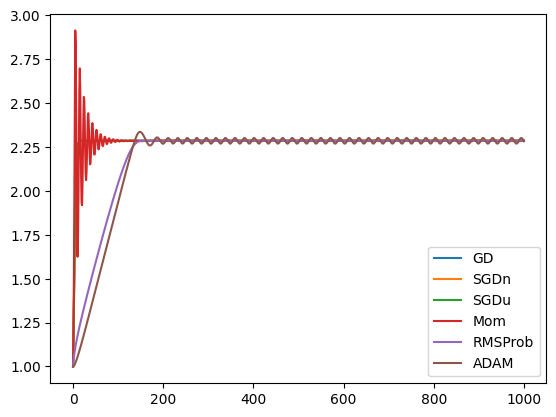

In [122]:
for hist, label in zip([history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb, history_ADAM],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb","ADAM"]):
    plt.plot(hist, label=label)
plt.legend()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_4940\3540472124.py:2: RuntimeWarning: overflow encountered in power
  return np.power(x,4) - 10 * np.square(x) - 2* x
C:\Users\dell\AppData\Local\Temp\ipykernel_4940\3540472124.py:2: RuntimeWarning: invalid value encountered in subtract
  return np.power(x,4) - 10 * np.square(x) - 2* x


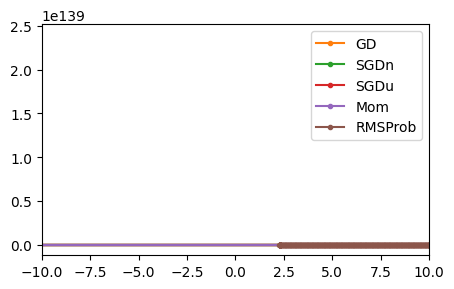

In [72]:
plot(f_test,[history_gd, history_sgd_n, history_sgd_u, history_momentum, history_RMSProb],
                ["GD", "SGDn", "SGDu", "Mom", "RMSProb"], (-10,10))

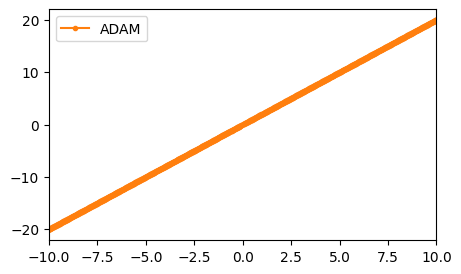

In [60]:
plot(f_test,[ history_ADAM],
                ["ADAM"], (-10,10))

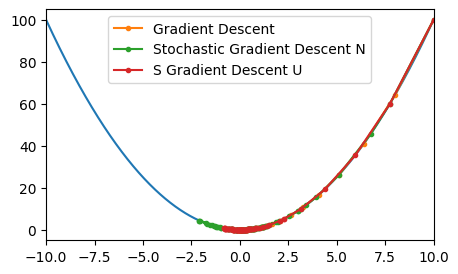

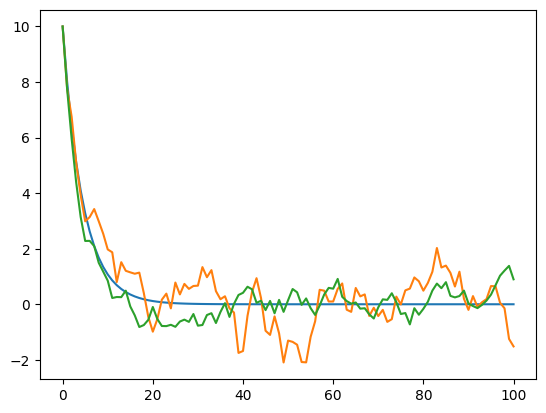

In [18]:
history_gd = gradient_descent(10, 0.1, 100, f_prim) 
history_sgd_n = stochastic_gradient_descent(10, 0.1, 100, f_prim,"normal",sigma=0.5) 
history_sgd_u = stochastic_gradient_descent(10, 0.1, 100, f_prim,"uniform",sigma=0.5) 
plot(f,[history_gd,history_sgd_n,history_sgd_u], 
     ["Gradient Descent","Stochastic Gradient Descent N","S Gradient Descent U"], (-10,10))
plt.plot(history_gd)
plt.plot(history_sgd_n)
plt.plot(history_sgd_u)

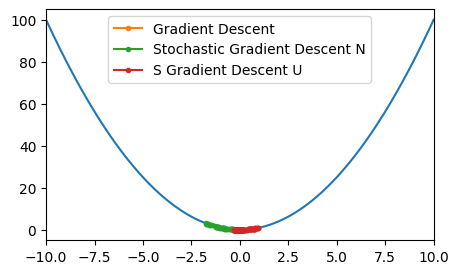

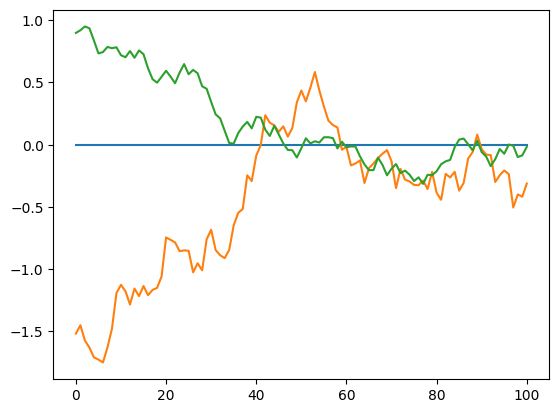

In [19]:
history_gd = gradient_descent(history_gd[-1], 0.01, 100, f_prim) 
history_sgd_n = stochastic_gradient_descent(history_sgd_n[-1], 0.01, 100, f_prim,"normal",sigma=0.1) 
history_sgd_u = stochastic_gradient_descent(history_sgd_u[-1], 0.01, 100, f_prim,"uniform",sigma=0.1) 
plot(f,[history_gd,history_sgd_n,history_sgd_u], 
     ["Gradient Descent","Stochastic Gradient Descent N","S Gradient Descent U"], (-10,10))
plt.plot(history_gd)
plt.plot(history_sgd_n)
plt.plot(history_sgd_u)

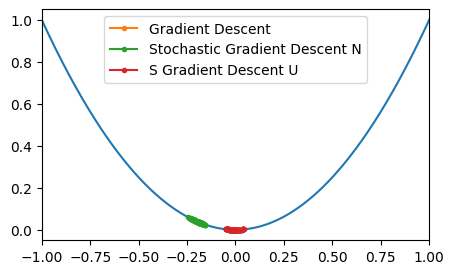

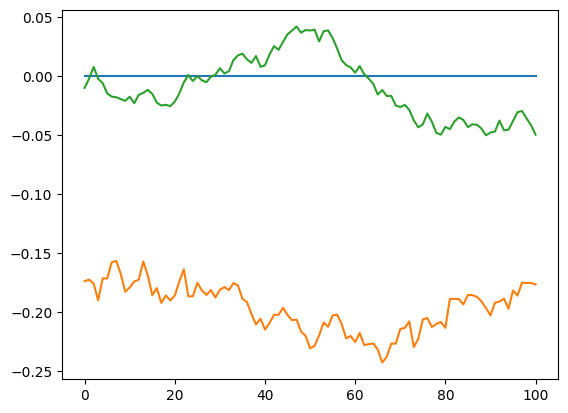

In [21]:
history_gd = gradient_descent(history_gd[-1], 0.001, 100, f_prim) 
history_sgd_n = stochastic_gradient_descent(history_sgd_n[-1], 0.001, 100, f_prim,"normal",sigma=0.01) 
history_sgd_u = stochastic_gradient_descent(history_sgd_u[-1], 0.001, 100, f_prim,"uniform",sigma=0.01) 
plot(f,[history_gd,history_sgd_n,history_sgd_u], 
     ["Gradient Descent","Stochastic Gradient Descent N","S Gradient Descent U"], (-1,1))
plt.plot(history_gd)
plt.plot(history_sgd_n)
plt.plot(history_sgd_u)

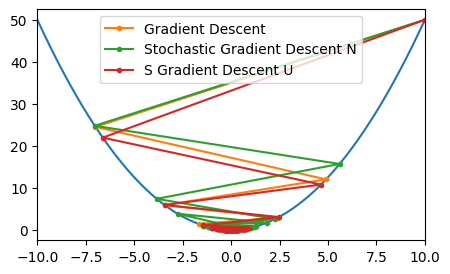

In [362]:
plot(f,[history_gd,history_sgd_n,history_sgd_u], 
     ["Gradient Descent","Stochastic Gradient Descent N","S Gradient Descent U"], (-10,10))

In [46]:
history = gradient_descent(10, 0.019999, 2, f2_prim) 

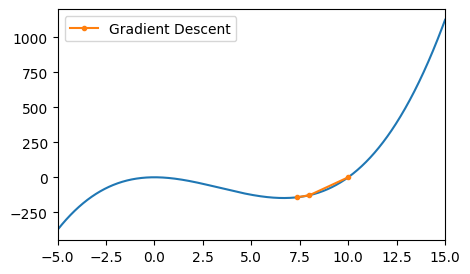

In [47]:
plot(f2,[history], ["Gradient Descent"], (-5,15))

In [58]:
history = gradient_descent(-4, 0.01, 100, f3_prim)

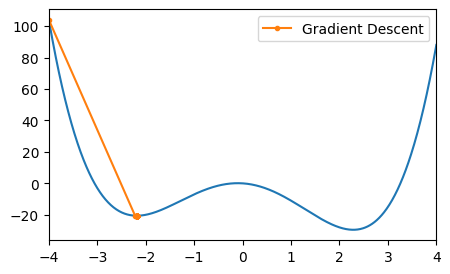

In [59]:
plot(f3,[history], ["Gradient Descent"], (-4,4))

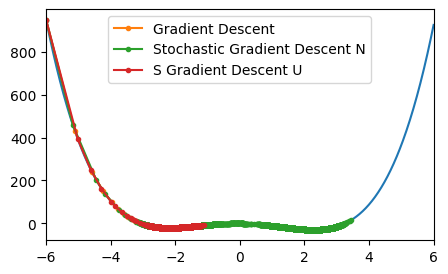

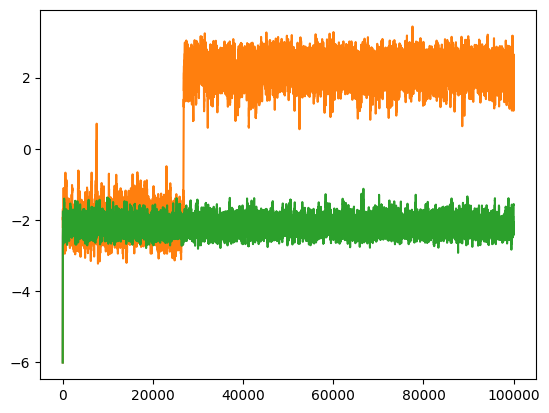

In [60]:
x_0 = -6
lr = 0.0012
iteration = 100000
history_gd = gradient_descent(x_0, lr, iteration, f3_prim) 
history_sgd_n = stochastic_gradient_descent(x_0, lr, iteration, f3_prim,"normal",sigma=0.1) 
history_sgd_u = stochastic_gradient_descent(x_0, lr, iteration, f3_prim,"uniform",sigma=0.1) 
plot(f3,[history_gd,history_sgd_n,history_sgd_u], 
     ["Gradient Descent","Stochastic Gradient Descent N","S Gradient Descent U"], (-6,6))
plt.plot(history_gd)
plt.plot(history_sgd_n)
plt.plot(history_sgd_u)

In [380]:
history_sgd_n

array([ -6.        ,   8.87612915, -43.49118098, ...,          nan,
                nan,          nan], shape=(10001,))

In [ ]:
# 2d

In [387]:
def g(x,y): 
    return (np.square(x) + np.square(y))/ 2

def g_prim_x(x,y): 
    return x 

def g_prim_y(x,y): 
    return y

In [277]:
def g(x,y): 
    return np.power(x,2)*np.power(y,3) + x + 3*y

def g_prim_x(x,y): 
    return 2*x *np.power(y,3) + 1

def g_prim_y(x,y): 
    return 3* np.power(x,2)*np.power(y,2) + 3

In [62]:
def g(x,y): 
    return np.power(x,2)/2 + 1/4*np.power(y,4) -  1/2*np.power(y,2)

def g_prim_x(x,y): 
    return x

def g_prim_y(x,y): 
    return np.power(y,3) - y

In [63]:
def gradient_descent2D(start, learning_rate, iterations, gradient):
    x, y = start
    history  = np.array([(start)])
    for _ in range(iterations):
        grad_x = gradient[0](x,y)
        grad_y = gradient[1](x,y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        history = np.append(history, (x,y))
    return history.reshape(-1,2)

In [64]:
def stochastic_gradient_descent2D(start, learning_rate, iterations, gradient, noise_type, sigma=0.05):
    x, y = start
    history  = np.array([(start)])
    for _ in range(iterations):
        if noise_type=="normal":
            noise_x = np.random.normal(0,sigma)
            noise_y = np.random.normal(0,sigma)
        elif noise_type=="uniform":
            noise_x = np.random.uniform(-sigma, sigma)
            noise_y = np.random.uniform(-sigma, sigma)
        else:
            noise =0
        grad_x = gradient[0](x,y)
        grad_y = gradient[1](x,y)
        x -= learning_rate * grad_x + noise_x
        y -= learning_rate * grad_y + noise_y
        history = np.append(history, (x,y))
    return history.reshape(-1,2)

In [65]:
def plot2D(history_list, labels, function, xlim, ylim):
    h=0.1
    x_min, x_max = xlim.min(), xlim.max()
    y_min, y_max = ylim.min(), ylim.max()
    X = np.arange(x_min, x_max, h)
    Y = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(X, Y)
    Z = function(xx,yy)
    plt.contour(xx,yy,Z,levels =1000)
    for point, label in zip(history_list, labels):
        plt.plot(point[:,0],point[:,1], label = label, marker = ".",alpha=0.5)
    plt.legend()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

    ax = plt.figure().add_subplot(projection='3d')

    
    # Plot the 3D surface
    ax.plot_surface(xx,yy,Z, edgecolor='royalblue', lw=0.05, rstride=1, cstride=8,
                    alpha=0.3)
    for point, label in zip(history_list, labels):
        ax.plot(point[:,0],point[:,1], function(point[:,0],point[:,1]), label = label, marker = ".",alpha=0.5)
    plt.legend()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
    plt.show()


In [75]:
sp = (2.5,0.001)
history_gd = gradient_descent2D(sp, 0.02, 500, (g_prim_x, g_prim_y) )
history_sgd_N = stochastic_gradient_descent2D(sp, 0.02, 500, (g_prim_x, g_prim_y) ,"normal",sigma=0.01 )
history_sgd_U = stochastic_gradient_descent2D(sp, 0.02, 500, (g_prim_x, g_prim_y) ,"uniform",sigma=0.01 )

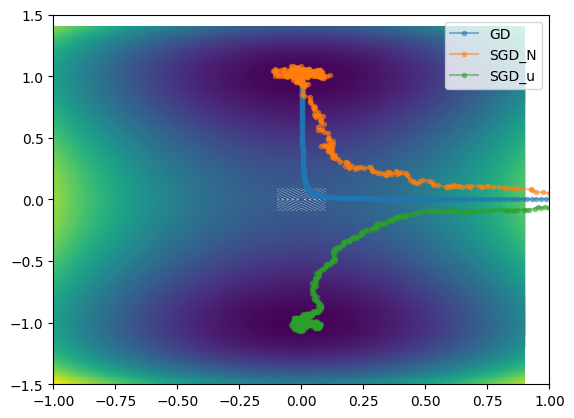

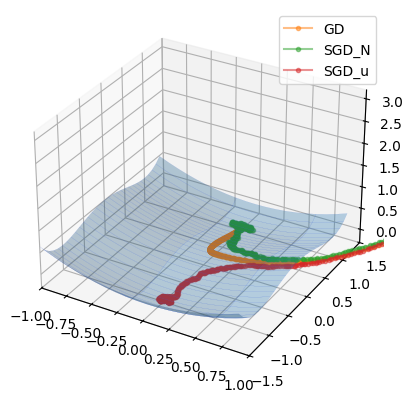

In [76]:
plot2D([history_gd,history_sgd_N, history_sgd_U], ["GD","SGD_N", "SGD_u"], g, np.array([-1,1]),
       np.array([-1.5,1.5]))